### C S 329E HW 4

## Pair Programming Group Number: 6
## Members of Team: Michel Gonzalez

## Decision Tree Classifier


For this weeks homework we are going to explore ideas around decision tree implementation!  

We will implement some helper functions that would be necessary for a home-grown tree:
  - calc_entropy
  - calc_gini
  
and them test them out at given data splits. 
  
And finally, to perform predictive and descriptive analytics we use the [Decision Tree Classifier](https://scikit-learn.org/stable/modules/tree.html#classification) class in the scikit-learn package.

  
For this assignment, the stopping condition will be the depth of the tree. The impurity measure can be either `Entropy` or `Gini`.

To test our tree built from the Decision Tree Classifier class, we will revisit our Melbourne housing data (that has been cleaned and pruned) and use the files:

   - `melb_tree_train.csv` for training the decision tree (we'll also see what happens if we use the same data to test as we used to train the data in the last problem)
   - `melb_tree_test.csv` for testing the decision tree

There are 10 features in these dataframes that we can use to describe and predict the class label housing "Type", which is 'h' house, 'u' duplex, or 't' townhome. 

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log2
from sklearn import tree # you'll probably need to install this - look at Q6 for a link 
import graphviz # you'll probably need to install this - look at Q6 for a link 

In [2]:
df_train = pd.read_csv('https://gist.githubusercontent.com/yanyanzheng96/f8ba57f8377dee0810271475c728fca8/raw/afa3fa4305b55e31135980835d40b27af31f288c/melb_tree_train.csv')
df_train.head()

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
0,2,t,771000.0,13.8,2.0,1.0,1.0,0.0,99.0,1992.0,Bayside
1,3,t,700000.0,7.9,3.0,2.0,1.0,189.0,110.0,1990.0,Banyule
2,3,u,975000.0,12.1,3.0,2.0,1.0,277.0,109.0,1975.0,Glen Eira
3,3,h,1290000.0,8.0,3.0,1.0,1.0,618.0,132.0,1960.0,Moonee Valley
4,2,u,500000.0,4.2,2.0,1.0,1.0,0.0,86.0,2000.0,Melbourne


In [3]:
df_test = pd.read_csv('https://gist.githubusercontent.com/yanyanzheng96/ec66da011b165f0e282c0c1f8447010e/raw/d02c3829a7e9db2d156ba1ab9d5bb4d18ae57be8/melb_tree_test.csv')
df_test.head()

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
0,2,t,930000.0,2.6,2.0,1.0,1.0,97.0,85.0,2004.0,Yarra
1,3,t,815000.0,11.0,3.0,2.0,2.0,159.0,130.0,2014.0,Hobsons Bay
2,4,h,638000.0,13.0,4.0,2.0,1.0,624.0,258.0,2005.0,Moreland
3,2,t,595000.0,11.2,2.0,2.0,1.0,201.0,111.0,2005.0,Moreland
4,3,t,620500.0,11.2,3.0,2.0,1.0,158.0,117.0,2011.0,Darebin


## Q1 Load the Data
Load in the melb_tree_train.csv into a dataframe, and split that dataframe into `df_X`, which contains the features of the data set (everything but `Type`), and `s_y`, the series containing just the class label (just `Type`). The lengths of `df_X` and `s_y` should match.

In [4]:
df_X = df_train.drop(columns = 'Type')

s_y = df_train['Type']

#len(df_X) == len(s_y)

## Q2 Implement a function to calculate entropy 
Implement a function `calc_entropy` that takes the the class label series, `s_y`, as a parameter. Implement using the definition on p128 in the DM book and only use pandas and log2 libraries

In [5]:
# calc_entropy(s_y) definition

# Equation:
# sum(-pi*log2(pi)) for i = 1, 2, ..., c

def calc_entropy(s_y):
  
  # gets the number of unique catagories, the length of the array s_y
  # and how many times each catagory is in the array
  c_entropy= len(s_y.unique())

  length_entropy = len(s_y)

  counts_entropy = pd.array(s_y.value_counts())

  #gets all the pi values
  p_entropy = pd.array([pd.NA for i in range(0, c_entropy)])
  
  for i in range (0, len(counts_entropy)):
    
    p_entropy[i] = (counts_entropy[i]/length_entropy)

  # finds the impurty through the entryopy equation

  impurity_entropy = 0

  for i in range(0, c_entropy):
    
    impurity_entropy += -p_entropy[i] * log2(p_entropy[i])

  return impurity_entropy

## Q3 Use the entropy function to
  - (a) Calculate the entropy of the entire training set
  - (b) Calculate the entropy of the three partitions formed from the following three intervals:

(i) Landsize $\in [0,200]$

(ii) Landsize $\in (200,450]$

(iii) Landsize $\in (450, \infty)$

In [6]:
# The entire data set

calc_entropy(s_y)

1.5825333114261775

In [7]:
# Less than or equal to 200

low_entropy= df_X[(df_X['Landsize'] >= 0) & (df_X['Landsize'] <= 200)]

low_ent_index = low_entropy.index

low_ent_type = pd.array([pd.NA for i in range(0, len(low_ent_index))])

for i in range(0, len(low_ent_index)):

  low_ent_type[i] = s_y[low_ent_index[i]]

calc_entropy(low_ent_type)

1.3456432116206725

In [8]:
# Between 200 and 450

mid_entropy  = df_X[(df_X['Landsize'] > 200) & (df_X['Landsize'] <= 450)]

mid_ent_index = mid_entropy.index

mid_ent_type = pd.array([pd.NA for i in range(0, len(mid_ent_index))])

for i in range(0, len(mid_ent_index)):

  mid_ent_type[i] = s_y[mid_ent_index[i]]

calc_entropy(mid_ent_type)

1.4660501816027975

In [9]:
# greater than 450

high_entropy  = df_X[df_X['Landsize'] > 450]

high_ent_index = high_entropy.index

high_ent_type = pd.array([pd.NA for i in range(0, len(high_ent_index))])

for i in range(0, len(high_ent_index)):

  high_ent_type[i] = s_y[high_ent_index[i]]

calc_entropy(high_ent_type)

1.09954792005911

## Q4 Implement a function to calculate the Gini Index
Implement the function `calc_gini` that takes the class label series, `s_y`, as a parameter. Implement using the definition on p128 in the DM book and only use the pandas library.

In [10]:
# calc_entropy(s_y) definition

# Equation:
# 1 - sum(pi^2) for i = 1, 2, ..., c
def calc_gini( s_y ):

  # gets the number of unique catagories, the length of the array s_y
  # and how many times each catagory is in the array
  c_gini = len(s_y.unique())

  length_gini = len(s_y)

  counts_gini = pd.array(s_y.value_counts())

  #gets all the pi values
  p_gini = pd.array([pd.NA for i in range(0, c_gini)])
  
  for i in range (0, len(counts_gini)):
  
    p_gini[i] = counts_gini[i]/length_gini

  # finds the impurty through the entryopy equation

  sum_gini = 0

  for i in range(0, c_gini):
    
    sum_gini += p_gini[i] ** 2

  impurity_gini = 1 - sum_gini

  return impurity_gini

## Q5 Use the Gini Index function to
  - (a) Calculate the Gini index of the entire training set
  - (b) Calculate the Gini index of the three partitions formed from the following three intervals:

(i) Landsize $\in [0,200]$

(ii) Landsize $\in (200,450]$

(iii) Landsize $\in (450, \infty)$

In [11]:
# The entire data set

calc_gini(s_y)

0.6655601280292638

In [12]:
# Less than or equal to 200
low_gini = df_X[(df_X['Landsize'] >= 0) & (df_X['Landsize'] <= 200)]

low_gini_index = low_gini.index

low_gini_type = pd.array([pd.NA for i in range(0, len(low_gini_index))])

for i in range(0, len(low_gini_index)):

  low_gini_type[i] = s_y[low_gini_index[i]]

calc_gini(low_gini_type)

0.5741211482422965

In [13]:
# Between 200 and 450
mid_gini = df_X[(df_X['Landsize'] > 200) & (df_X['Landsize'] <= 450)]

mid_gini_index = mid_gini.index

mid_gini_type = pd.array([pd.NA for i in range(0, len(mid_gini_index))])

for i in range(0, len(mid_gini_index)):

  mid_gini_type[i] = s_y[mid_gini_index[i]]

calc_gini(mid_gini_type)

0.6101021682602731

In [14]:
# greater than 450

high_gini = df_X[df_X['Landsize'] > 450]

high_gini_index = high_gini.index

high_gini_type = pd.array([pd.NA for i in range(0, len(high_gini_index))])

for i in range(0, len(high_gini_index)):

  high_gini_type[i] = s_y[high_gini_index[i]]

calc_gini(high_gini_type)

0.43819341715976323

## Q6 Create a decision tree 
Using [scikit-learn](https://scikit-learn.org/stable/modules/tree.html#tree) create a multi class classifer for the data set using the Entropy impurity measure and a max depth of 3.

Note that scikit-learn's algorithm doesn't handle categorical data, so that needs to be preprocessed using an one hot encoding.

Display the tree using `export_text` from sklearn.tree, and use that information to write some descriptive analytics on the classification of houses.  For extra fun, use the export_graphviz to draw the graph (see documentation on the [scikit-learn webpage](https://scikit-learn.org/stable/modules/tree.html#classification)). 

In [15]:
# Create Tree
council_hot = pd.get_dummies(df_X['CouncilArea'])

df_X_hot = df_X.join(council_hot).drop(columns='CouncilArea')

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3)
clf = clf.fit(df_X_hot, s_y)

In [16]:
# Display text version of the tree
from sklearn.tree import export_text

names_feat = list(df_X_hot.columns)

names_class = ['h','t','u']


tree_text = export_text(clf, feature_names= names_feat, max_depth = 3)

print(tree_text)

|--- YearBuilt <= 1977.50
|   |--- Rooms <= 2.50
|   |   |--- Price <= 915000.00
|   |   |   |--- class: u
|   |   |--- Price >  915000.00
|   |   |   |--- class: h
|   |--- Rooms >  2.50
|   |   |--- Landsize <= 429.00
|   |   |   |--- class: h
|   |   |--- Landsize >  429.00
|   |   |   |--- class: h
|--- YearBuilt >  1977.50
|   |--- BuildingArea <= 104.31
|   |   |--- Landsize <= 76.00
|   |   |   |--- class: u
|   |   |--- Landsize >  76.00
|   |   |   |--- class: t
|   |--- BuildingArea >  104.31
|   |   |--- Landsize <= 391.00
|   |   |   |--- class: t
|   |   |--- Landsize >  391.00
|   |   |   |--- class: h



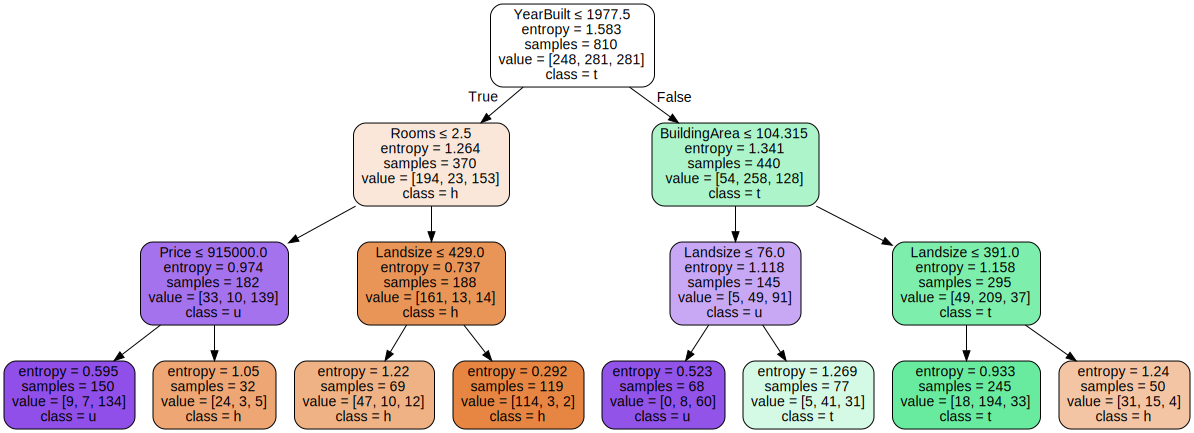

In [17]:
# Display graphviz version of the tree

tree_graph = tree.export_graphviz(clf, feature_names= names_feat, class_names=names_class, impurity=True, filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(tree_graph)  

graph 

From this tree we can see that a house that were built after 1977 will be classified based on the building area and specific landsize while houses built prioir to that year are classified based on first the number of rooms and then we use either the price or the land size ti classifiy a house.

## Q7 Calculate the Accuracy and Display Learning Curve
Load in the test data from melb_tree_test.csv.

Use the scikit-learn library to create many decision trees, each one with a different configuration (aka Hyperparameters).  You will create 28 different trees by:

    - Varying the max depth from 2 to 15 with the Gini Index as the impurity measure
    - Varying the max depth from 2 to 15 with the Entropy as the impurity measure

Implementation tip: you can create an array of numbers from 2 to 15 by using the numpy function [arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html).

For each of the 28 decistion trees, calculate the error rate by using the data in the: 
  - Training set, and
  - Test set.

Display the results graphicaly, and offer an analysis of the trend (or if no trend present, offer a hypotheisis of why).  The max depth should be on the x-axis, and the error rate should be on the y-axis (see figure 3.23 in your DM textbook for a similar style of graph that uses leaf nodes instead of depth for the x-axis). Your plot will include 4 series of data
   - Test error (entropy)
   - Test error (gini index)
   - Training error (entropy)
   - Training error (gini index)

In [18]:
# Load in the test data

depths = np.arange(2,16)

depths

df_X_test = df_test.join(council_hot).drop(columns=['CouncilArea', 'Type'])

s_y_test = df_test['Type']

df_X_test.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Banyule,Bayside,Boroondara,Brimbank,Darebin,Glen Eira,Hobsons Bay,Hume,Kingston,Knox,Manningham,Maribyrnong,Melbourne,Monash,Moonee Valley,Moreland,Port Phillip,Stonnington,Whitehorse,Wyndham,Yarra
0,2,930000.0,2.6,2.0,1.0,1.0,97.0,85.0,2004.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,815000.0,11.0,3.0,2.0,2.0,159.0,130.0,2014.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,638000.0,13.0,4.0,2.0,1.0,624.0,258.0,2005.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,595000.0,11.2,2.0,2.0,1.0,201.0,111.0,2005.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3,620500.0,11.2,3.0,2.0,1.0,158.0,117.0,2011.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [19]:
# Build the trees using the training data

# this will hold all the trees
gini_forest = np.array([pd.NA for i in range(0,len(depths))])

entropy_forest = np.array([pd.NA for i in range(0,len(depths))])


# Builds the trees into seperate lits for each type of impurity using the training data
for i in range(0, len(depths)):

  gini_forest[i] = tree.DecisionTreeClassifier(criterion='gini', max_depth = depths[i])

  entropy_forest[i] = tree.DecisionTreeClassifier(criterion='entropy', max_depth = depths[i])

  gini_forest[i] = gini_forest[i].fit(df_X_hot, s_y)

  entropy_forest[i] = entropy_forest[i].fit(df_X_hot, s_y)

acc_train_gini = np.array([pd.NA for i in range(0, len(depths))])

acc_test_gini = np.array([pd.NA for i in range(0, len(depths))])

acc_train_entropy = np.array([pd.NA for i in range(0, len(depths))])

acc_test_entropy = np.array([pd.NA for i in range(0, len(depths))])

for i in range(0, len(depths)):

  acc_train_gini[i] = 1 - ((s_y == gini_forest[i].predict(df_X_hot)).sum())/len(df_X_hot)

  acc_test_gini[i] = 1 -  ((s_y_test == gini_forest[i].predict(df_X_test)).sum())/len(df_X_test)

  acc_train_entropy[i] = 1 - ((s_y == entropy_forest[i].predict(df_X_hot)).sum())/len(df_X_hot)

  acc_test_entropy[i] = 1 - ((s_y_test == entropy_forest[i].predict(df_X_test)).sum())/len(df_X_test)

Text(0.5, 0, 'Max Depth')

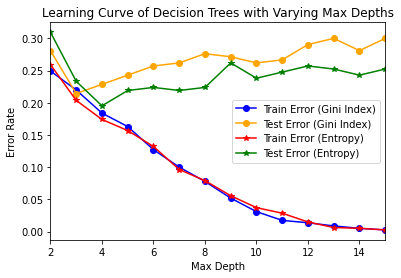

In [20]:
# Plot the 4 learning curves

plt.plot(depths, acc_train_gini, '-o', color = 'blue', label = 'Train Error (Gini Index)')

plt.plot(depths, acc_test_gini, '-o', color = 'orange', label = 'Test Error (Gini Index)')

plt.plot(depths, acc_train_entropy, '-*', color = 'red', label = 'Train Error (Entropy)')

plt.plot(depths, acc_test_entropy, '-*', color = 'green', label = 'Test Error (Entropy)')

plt.xlim(2,15)

plt.legend()

plt.title('Learning Curve of Decision Trees with Varying Max Depths')

plt.ylabel('Error Rate')

plt.xlabel('Max Depth')



There are two trends to follow, first the trained predictions predict that the deeper the tree is the more accurtate its predictions become. This makes sense only for the data used to train the tree since it is pinpointing the data it used to train. 

The second trend to follow and the more important one is that after the tree is about three or four levels deep the error begins to increase once again so this shows that each method of impurity has its own local minimum for the error before begins to rise again.

One last note is that the entropy mehtod holds for one more depth level than the Gini Index method for impurity.